# Thermal Motion - Data Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data files
df_01 = pd.read_csv("./data/data_16.txt", sep='\t', header=1, skiprows=0)
df_02 = pd.read_csv("./data/data_16.2.txt", sep='\t', header=1, skiprows=0)
df_03 = pd.read_csv("./data/data_16.3.txt", sep='\t', header=1, skiprows=0)
df_04 = pd.read_csv("./data/data_16.4.txt", sep='\t', header=1, skiprows=0)
df_05 = pd.read_csv("./data/data_17.txt", sep='\t', header=1, skiprows=0)
df_06 = pd.read_csv("./data/data_17.1.txt", sep='\t', header=1, skiprows=0)
df_07 = pd.read_csv("./data/data_18.txt", sep='\t', header=1, skiprows=0)
df_08 = pd.read_csv("./data/data_18.1.txt", sep='\t', header=1, skiprows=0)
df_09 = pd.read_csv("./data/data_18.2.txt", sep='\t', header=1, skiprows=0)
df_10 = pd.read_csv("./data/data_18.3.txt", sep='\t', header=1, skiprows=0)
df_11 = pd.read_csv("./data/data_19.txt", sep='\t', header=1, skiprows=0)
df_12 = pd.read_csv("./data/data_19.1.txt", sep='\t', header=1, skiprows=0)
df_13 = pd.read_csv("./data/data_19.2.txt", sep='\t', header=1, skiprows=0)
df_14 = pd.read_csv("./data/data_19.3.txt", sep='\t', header=1, skiprows=0)

df = [df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_13, df_14]

## Mean Squared Distance vs. Time
Plotting the squared distance versus time (equation 12) should give a straight line with slope
2D for one-dimensional motion. The diffusion coeﬀicient $D$ can then be used to calculate
the Boltzmann constant $k$ by $D= kT /γ$. For each particle you tracked, use the squared
distance traveled to directly fit $D$ and calculate $k$.

1. Calculate the distance traveled as a function of time.
2. Plot the distance traveled as a function of time.
3. Fit a straight line to the dataset and use the fit coeﬀicients to calculate D and k.
4. Calculate the difference from the accepted value of k = 1.38 × 10−23J/K.

In [43]:
# squared distance traveled as a function of time

# 120 frames, 2 frames per second
# - time steps are 0.5s, add a time column
time = np.fromiter((0 + n*0.5 for n in range(120)), dtype=float)

for d in df:
    # time
    d.insert(loc=0, column='time', value=time)

    # distance from point to point
    dx = [];
    dy = [];
    i = 0;
    for r in d.iloc[1:].itertuples():
        # x
        dx.append((r[2]-d.iloc[i])[1])
        # y
        dy.append((r[3]-d.iloc[i])[2])
        i += 1;
    dx.append(0);
    dy.append(0);
    d.insert(loc=2, column='dx', value=dx)
    d.insert(loc=4, column='dy', value=dy)
    
    # calculate squared distance from point to point
    # d**2 = dx**2 + dx**2
    d['d^2'] = d['dx']**2 + d['dy']**2

display(df[4].head())

,time,X (pixels),dx,Y (pixels),dy,d^2
0,0.0,444.63,-3.70,283.87,-2.46,19.7416
1,0.5,440.93,6.22,281.41,-3.42,50.3848
2,1.0,447.15,4.65,277.99,0.81,22.2786
3,1.5,451.80,4.19,278.80,-0.48,17.7865
4,2.0,455.99,3.22,278.32,-4.89,34.2805


[5.518979501775856e-13, 3.1441270298916256e-13, 2.7559473413125026e-13, 3.110110919603177e-13, 3.8920463865316333e-13, 3.0721981730407554e-13, 3.666583197983187e-13, 3.3915179039079913e-13, 6.918377635518925e-13, 3.827905870649258e-13, 3.4524171744070166e-13, 4.643602391767261e-13, 3.0277752780584494e-13, 4.036799729921759e-13]
[5.464181234407018e-11, 4.744654191714124e-13, 4.2633328880029096e-13, -2.0642032257806043e-13, 1.9069300520629765e-13, -3.2109743331978143e-13, -5.78763079332577e-13, 1.4136833567546447e-13, 6.827274342053993e-11, -1.150217361702176e-12, -8.786810136042806e-14, 8.095888280294595e-13, 4.70876522700483e-15, 5.768536170757103e-13]


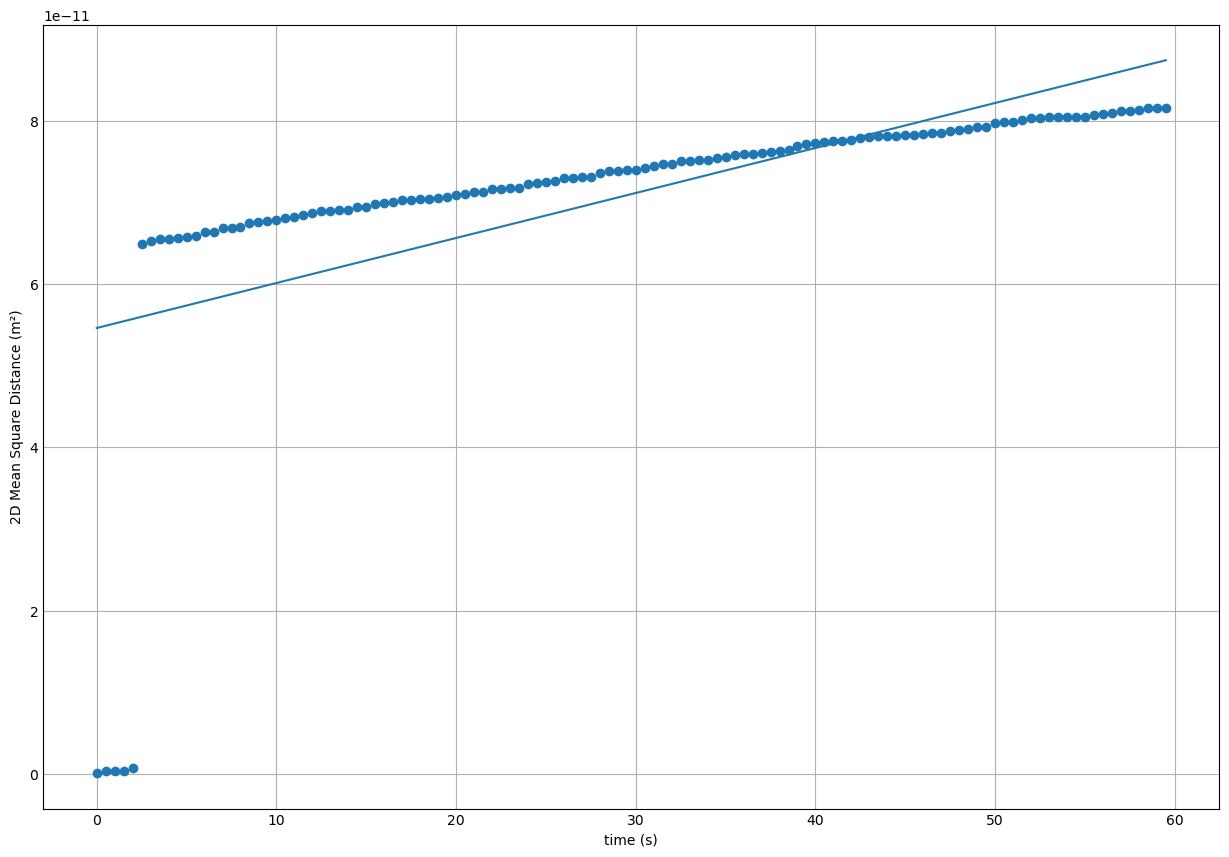

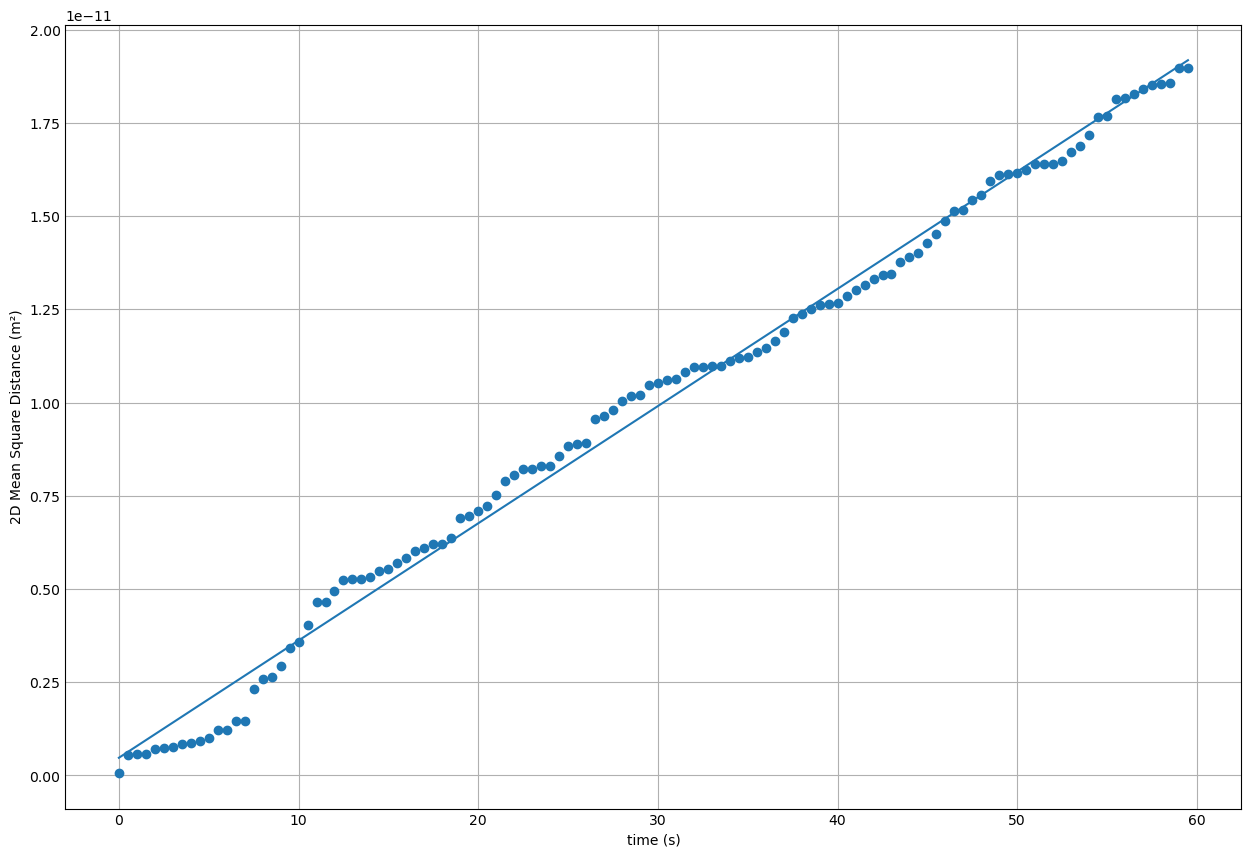

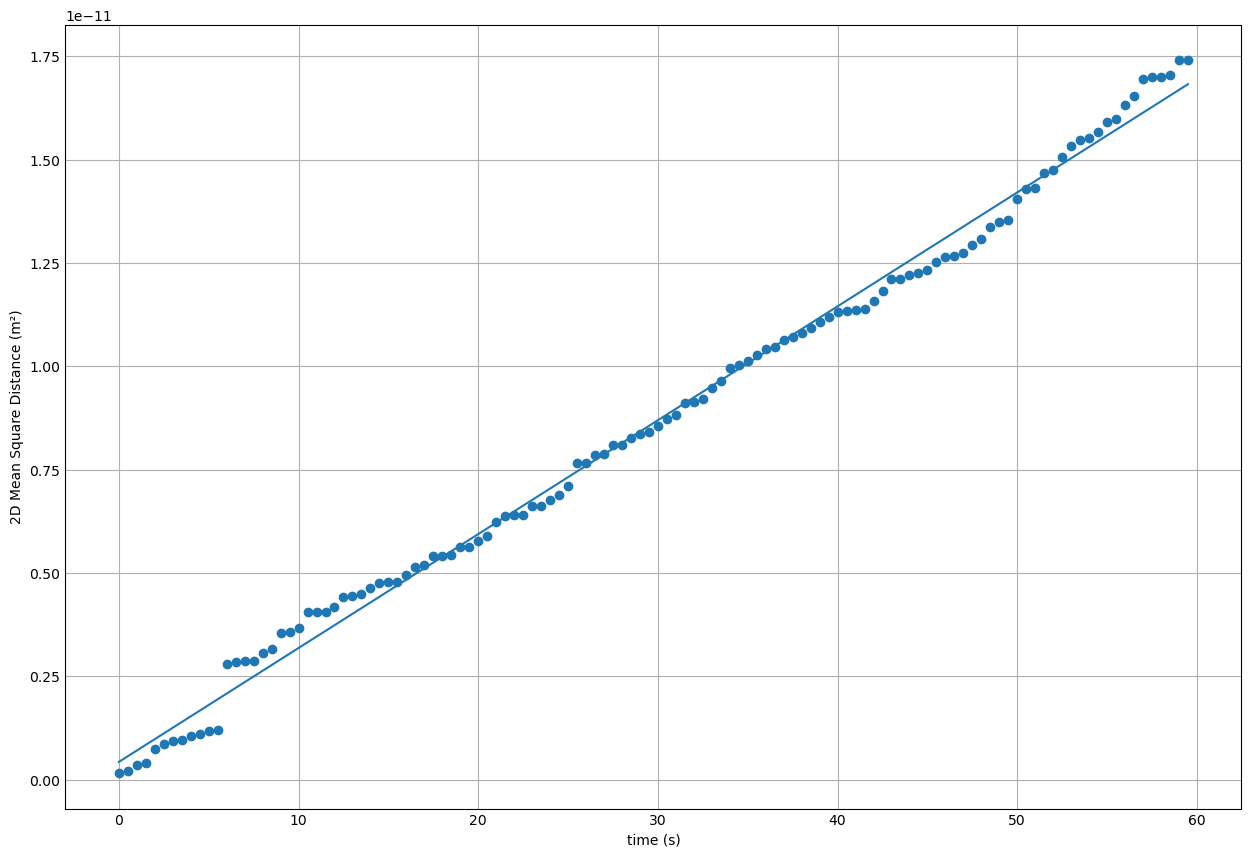

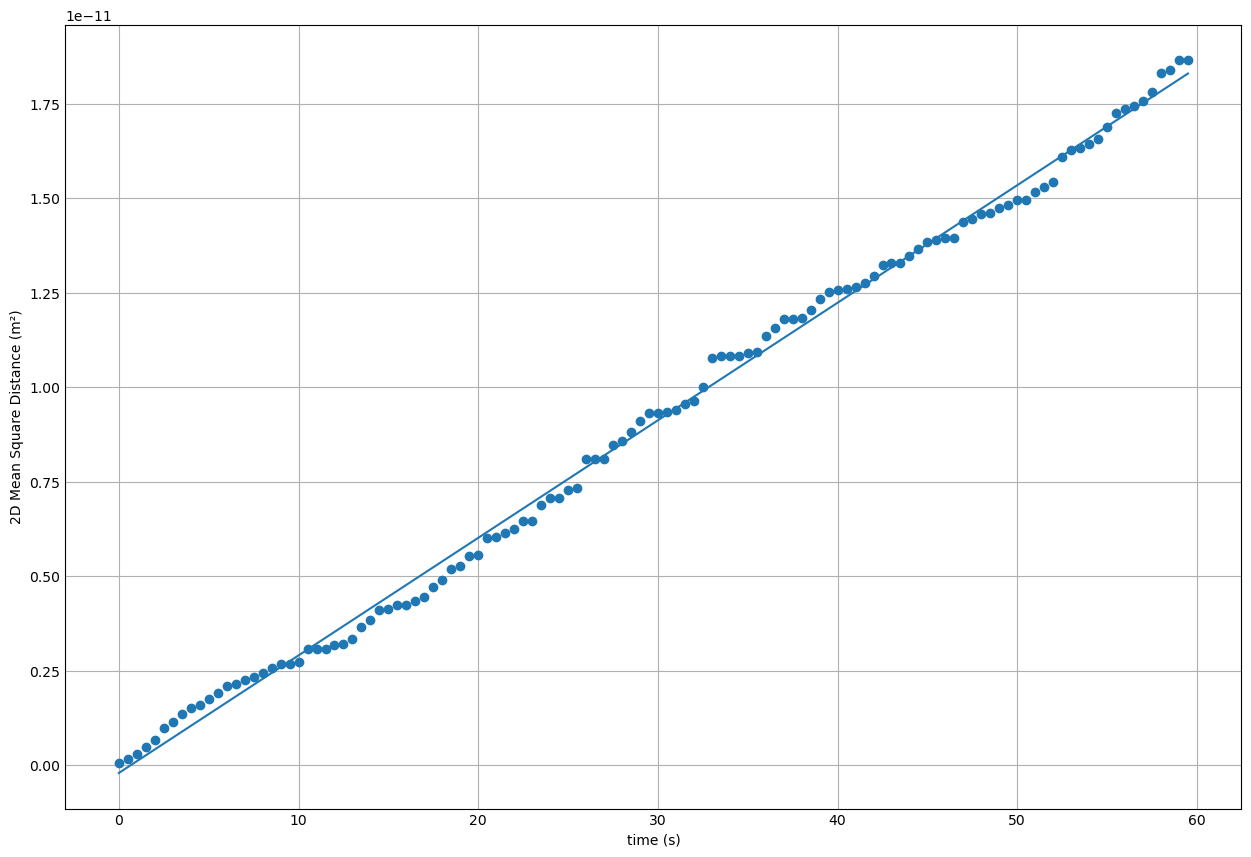

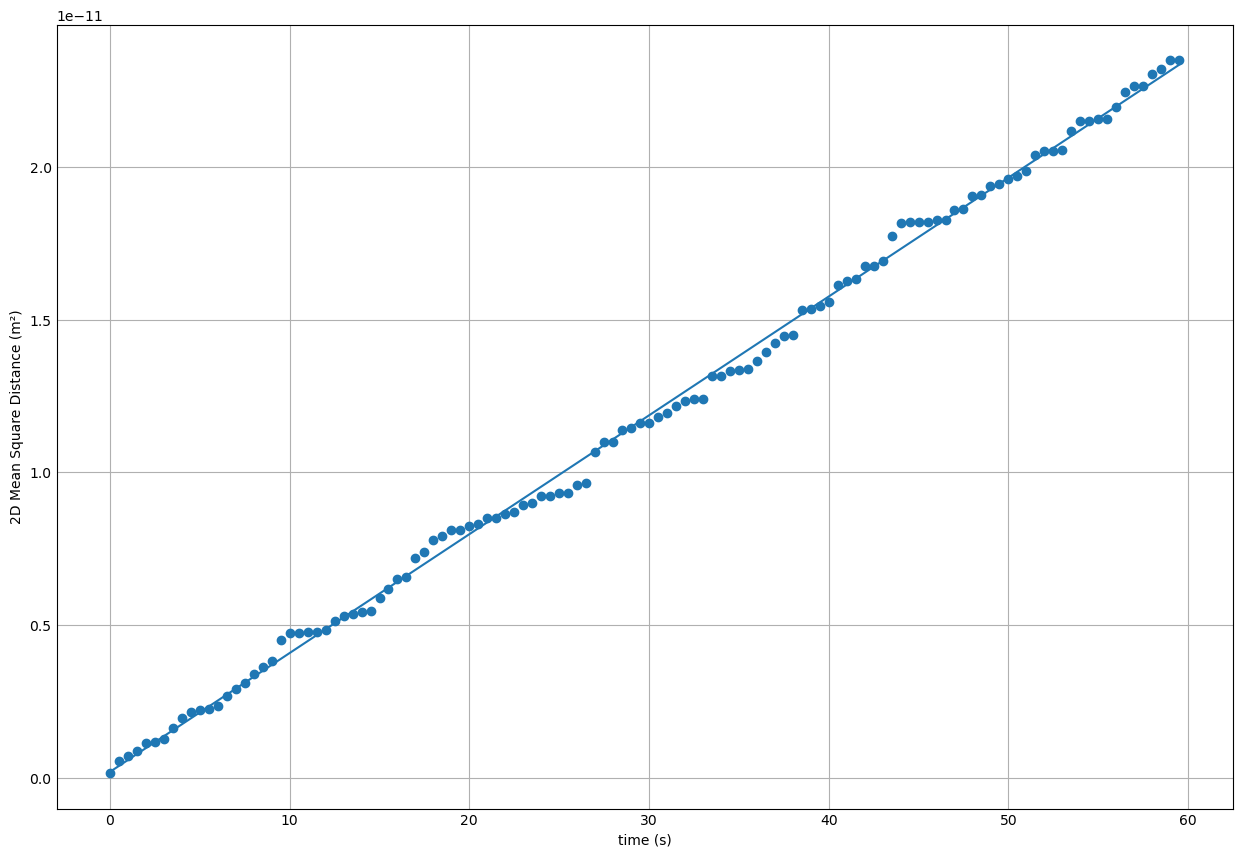

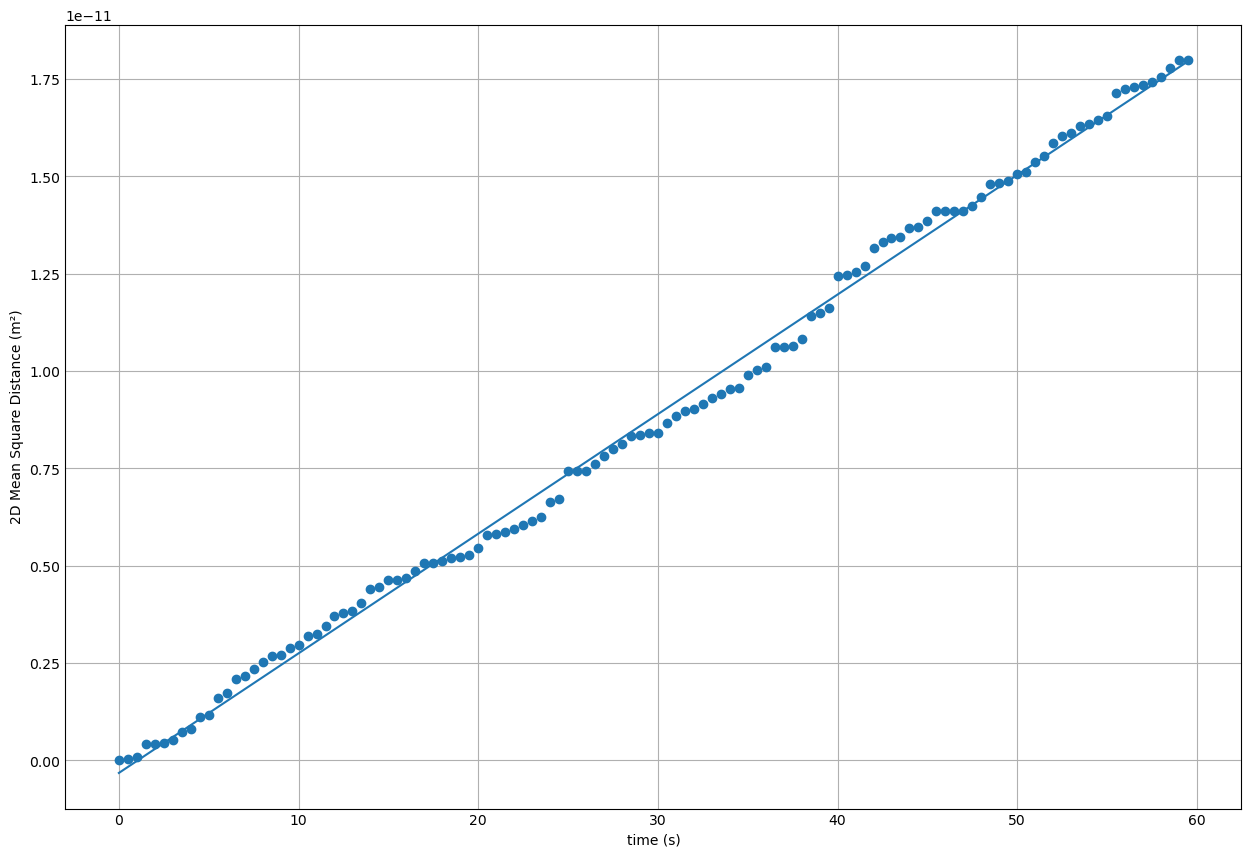

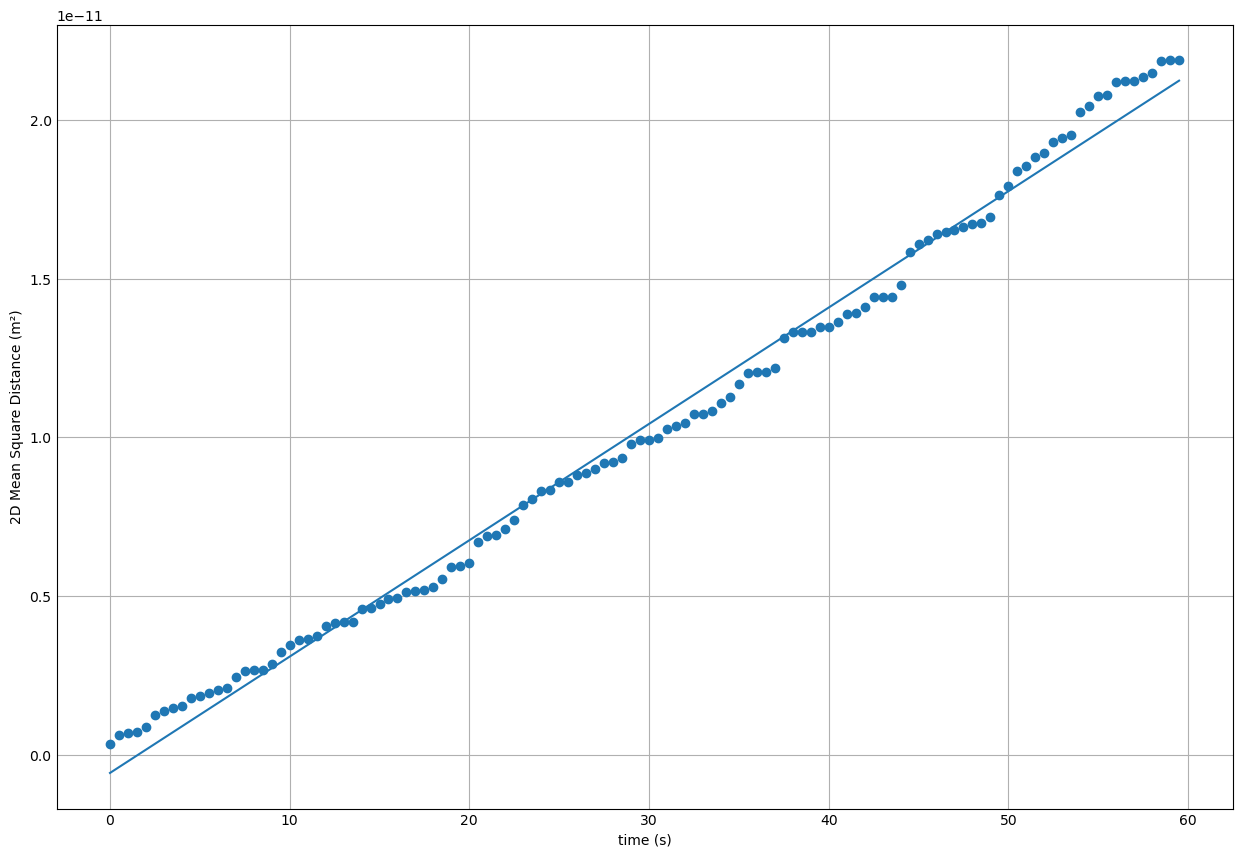

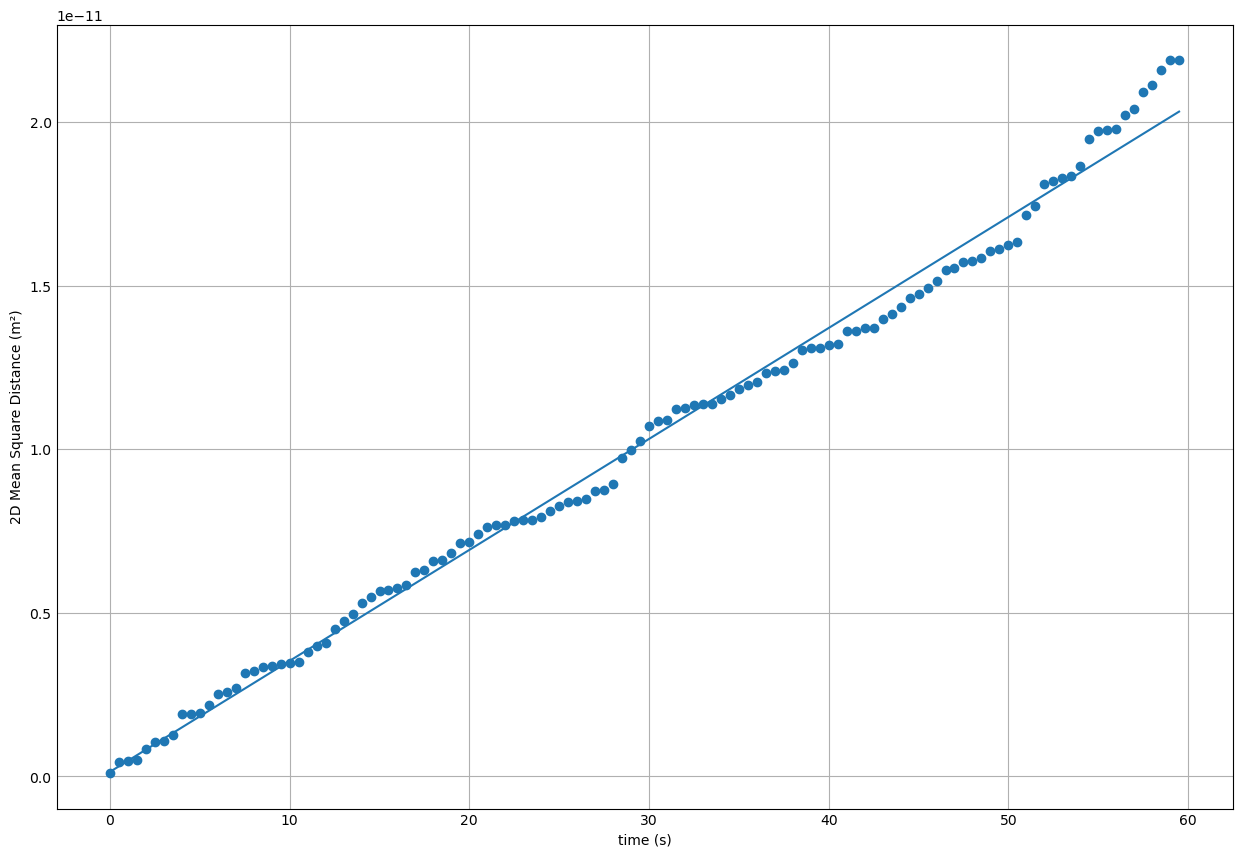

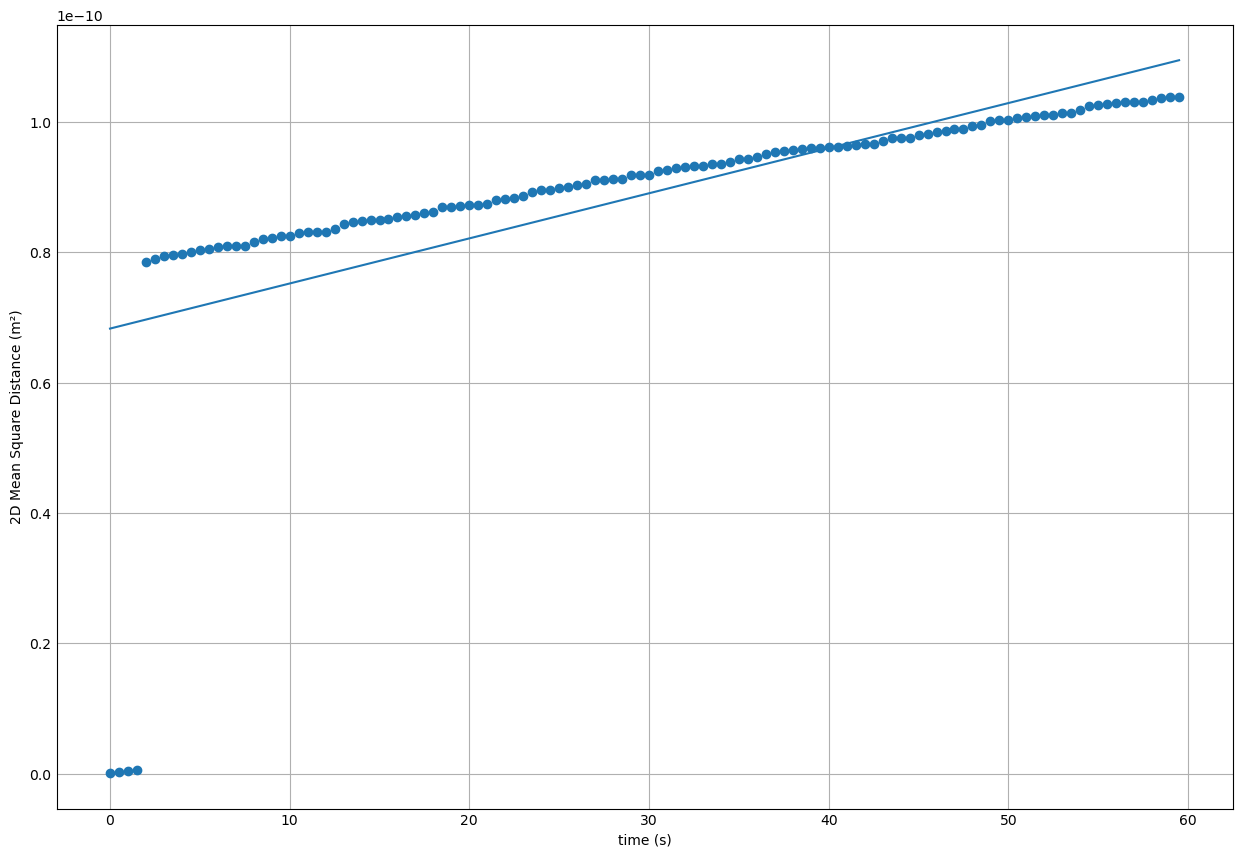

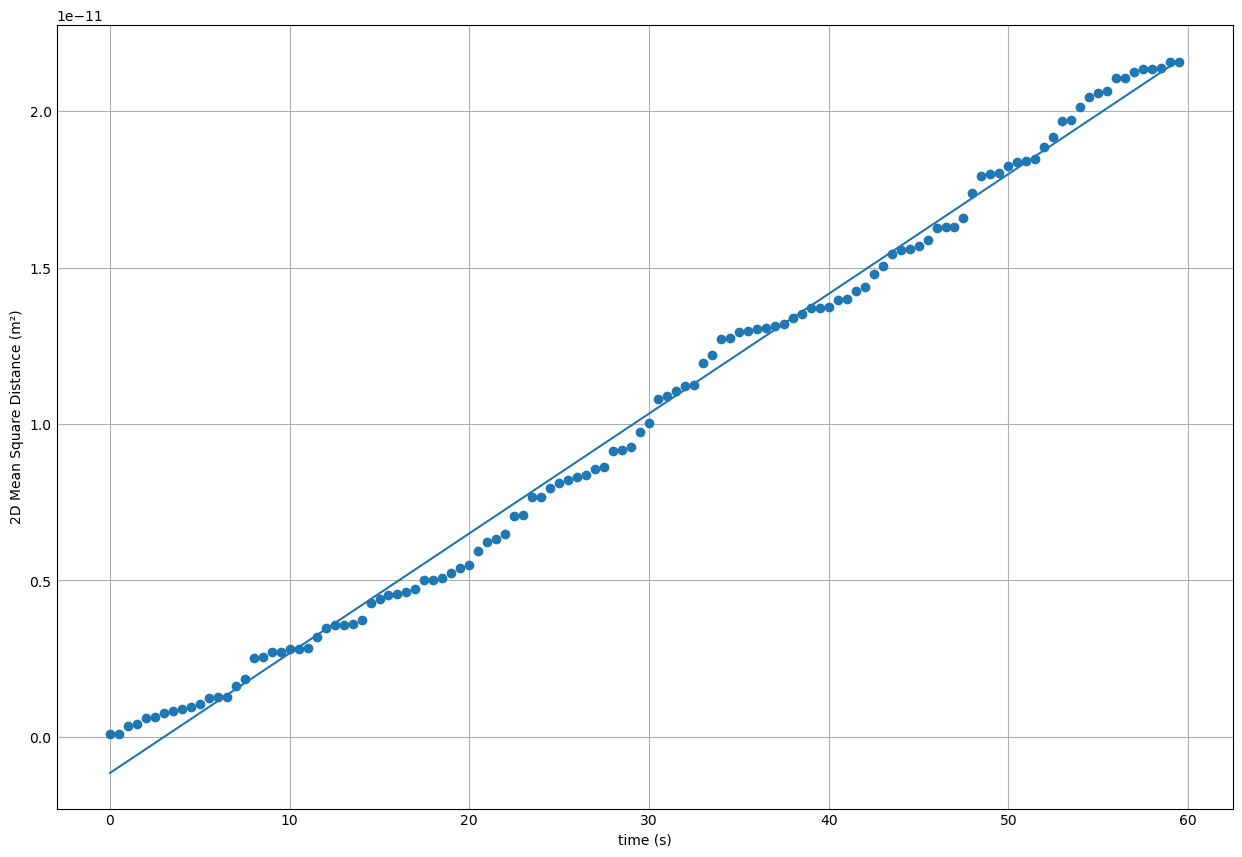

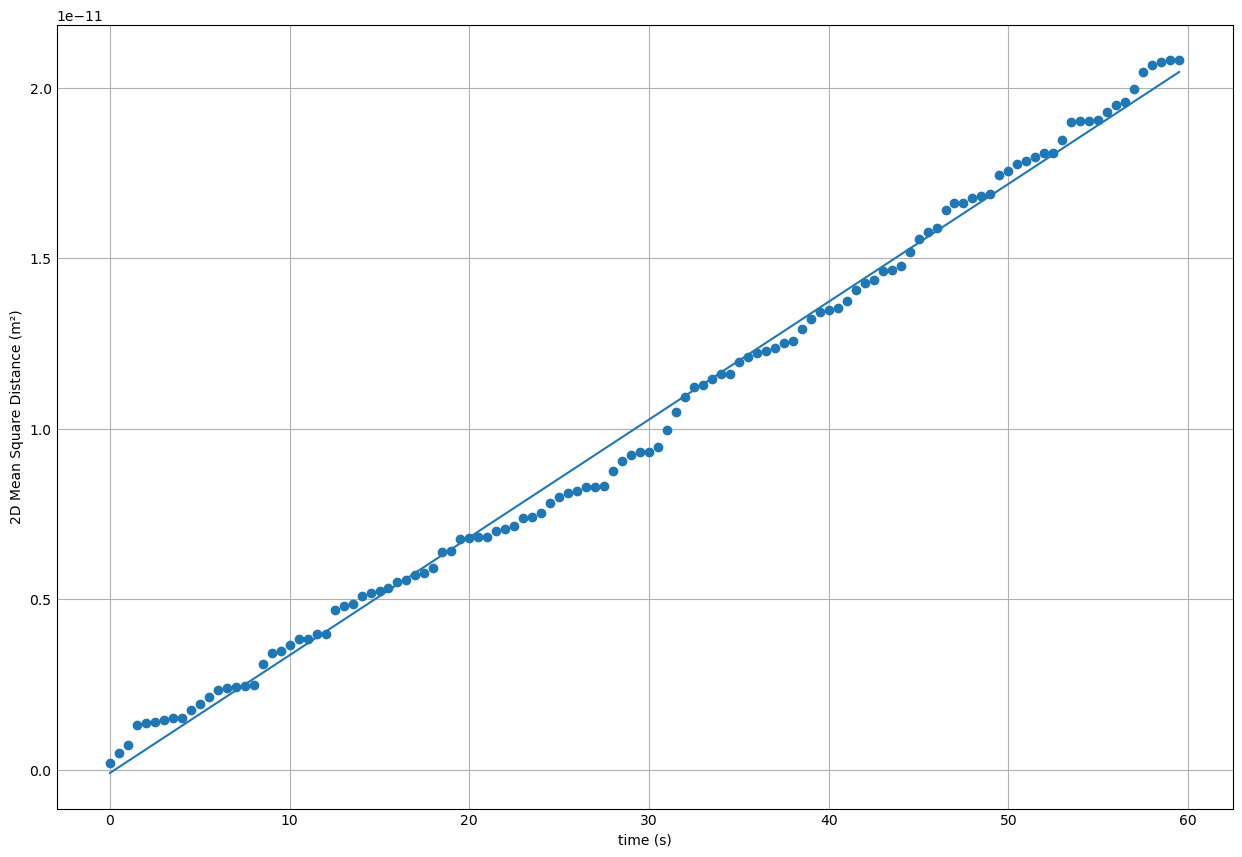

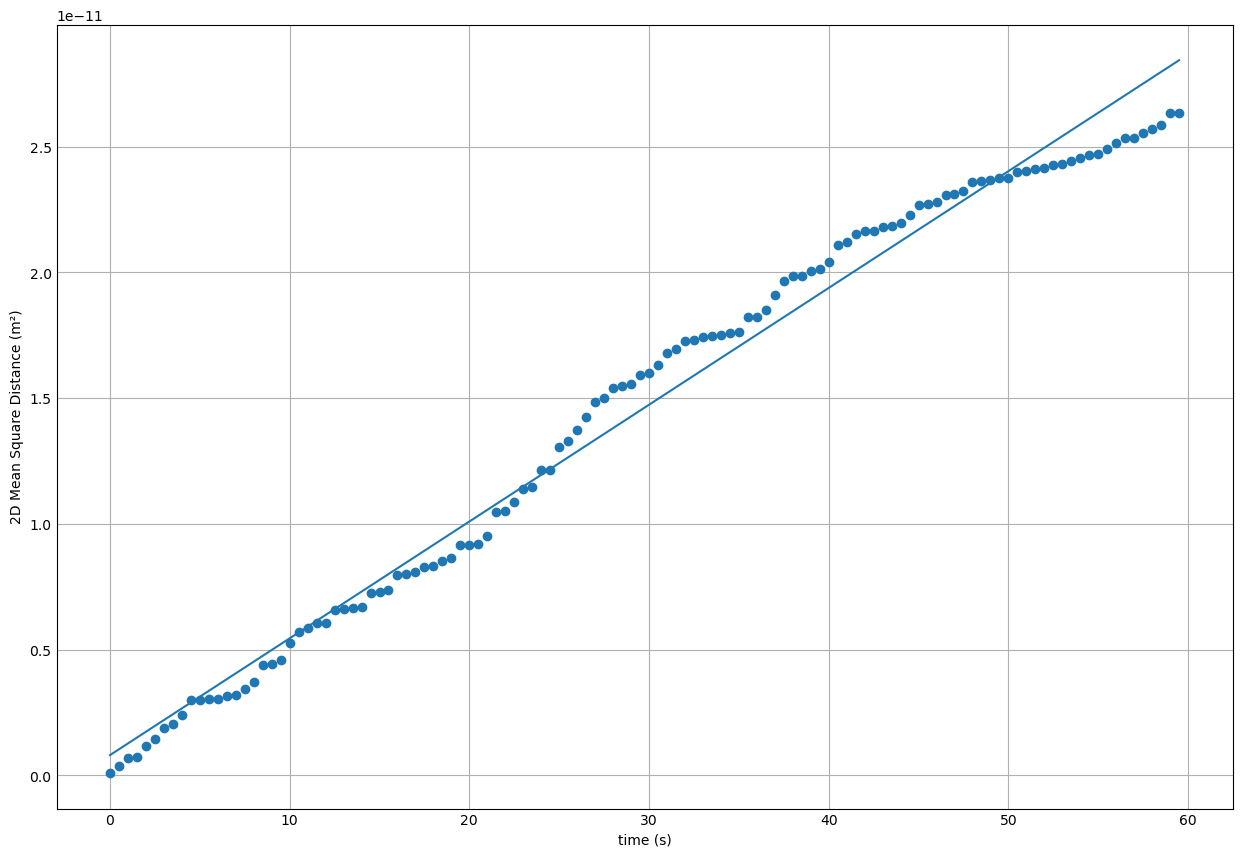

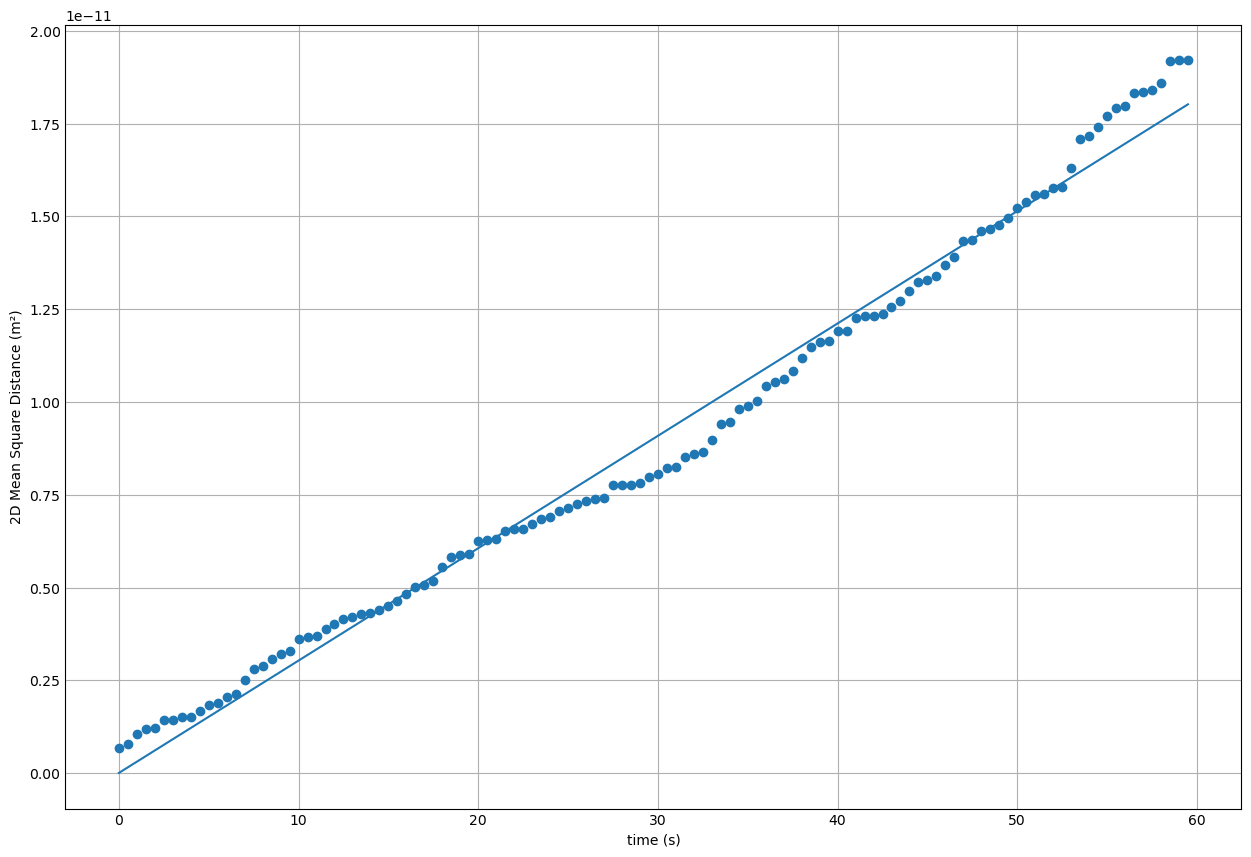

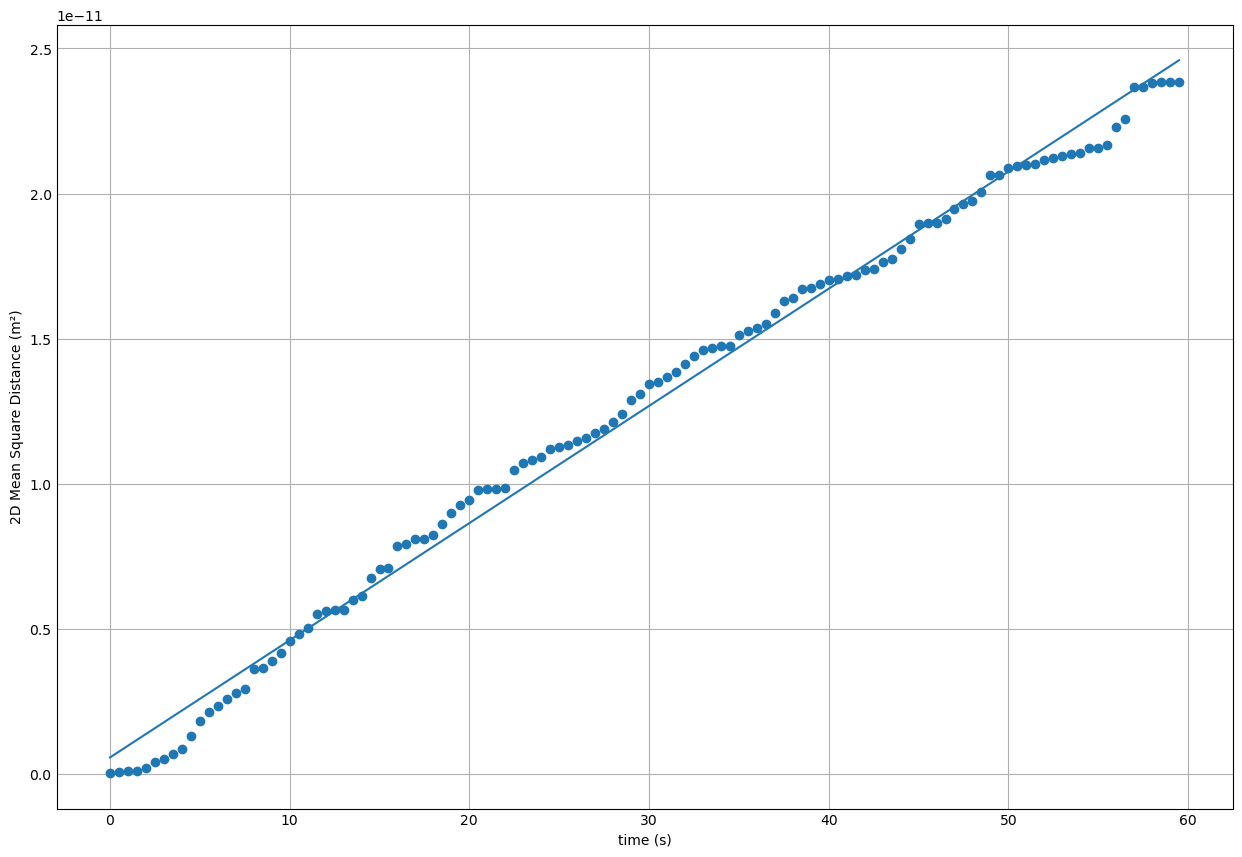

In [44]:
# plot! Will be in 2D
# ignoring outliers for now

a = []
b = []
D = []
k = []

i = 0
for d in df:
    # sum and unit conversion
    d['d^2'] = d['d^2'].cumsum()
    d['d^2'] = d['d^2']*((0.95*10**(-6))/10.75)**2

    plt.style.use('_mpl-gallery')
    
    # make the data
    x = np.array(d['time'].to_list())
    y = np.array((d['d^2']).to_list())

    # plot
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("2D Mean Square Distance (m\u00b2)")

    # line of best fit
    a.append(0)
    b.append(0)
    a[i], b[i] = np.polyfit(x, y, 1)
    ax.plot(x, a[i]*x+b[i])

    fig.set_size_inches(12, 8)
    name = "msdtime_" + str(i) + ".png"
    fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

    i += 1

print(a)
print(b)

In [45]:
# outliers

df[0]["d^2_g"] = df[0]["d^2"]
df[0]["d^2_g"].iloc[0:5] = np.nan
display(df[0].head(7))

df[8]["d^2_g"] = df[8]["d^2"]
df[8]["d^2_g"].iloc[0:4] = np.nan
display(df[8].head(7))

,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,565.90,1.86,317.80,-2.60,7.981126e-14,NaN
1,0.5,567.76,1.13,315.20,4.85,2.734853e-13,NaN
2,1.0,568.89,1.77,320.05,1.83,3.241058e-13,NaN
3,1.5,570.66,0.52,321.88,-0.43,3.276615e-13,NaN
4,2.0,571.18,6.04,321.45,-2.78,6.729251e-13,NaN
5,2.5,577.22,-48.42,318.67,-76.75,6.498566e-11,6.498566e-11
6,3.0,528.80,3.70,241.92,-5.11,6.529650e-11,6.529650e-11


,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,3.03,109.89,-2.34,1.144618e-13,NaN
1,0.5,604.76,-0.41,107.55,3.96,2.382420e-13,NaN
2,1.0,604.35,2.53,111.51,4.16,4.233810e-13,NaN
3,1.5,606.88,-2.16,115.67,-4.84,6.427627e-13,NaN
4,2.0,604.72,61.52,110.83,-78.63,7.848434e-11,7.848434e-11
5,2.5,666.24,2.81,32.20,-6.57,7.888311e-11,7.888311e-11
6,3.0,669.05,6.26,25.63,4.49,7.934659e-11,7.934659e-11


2.9219756877732015e-13 6.507765949405361e-11


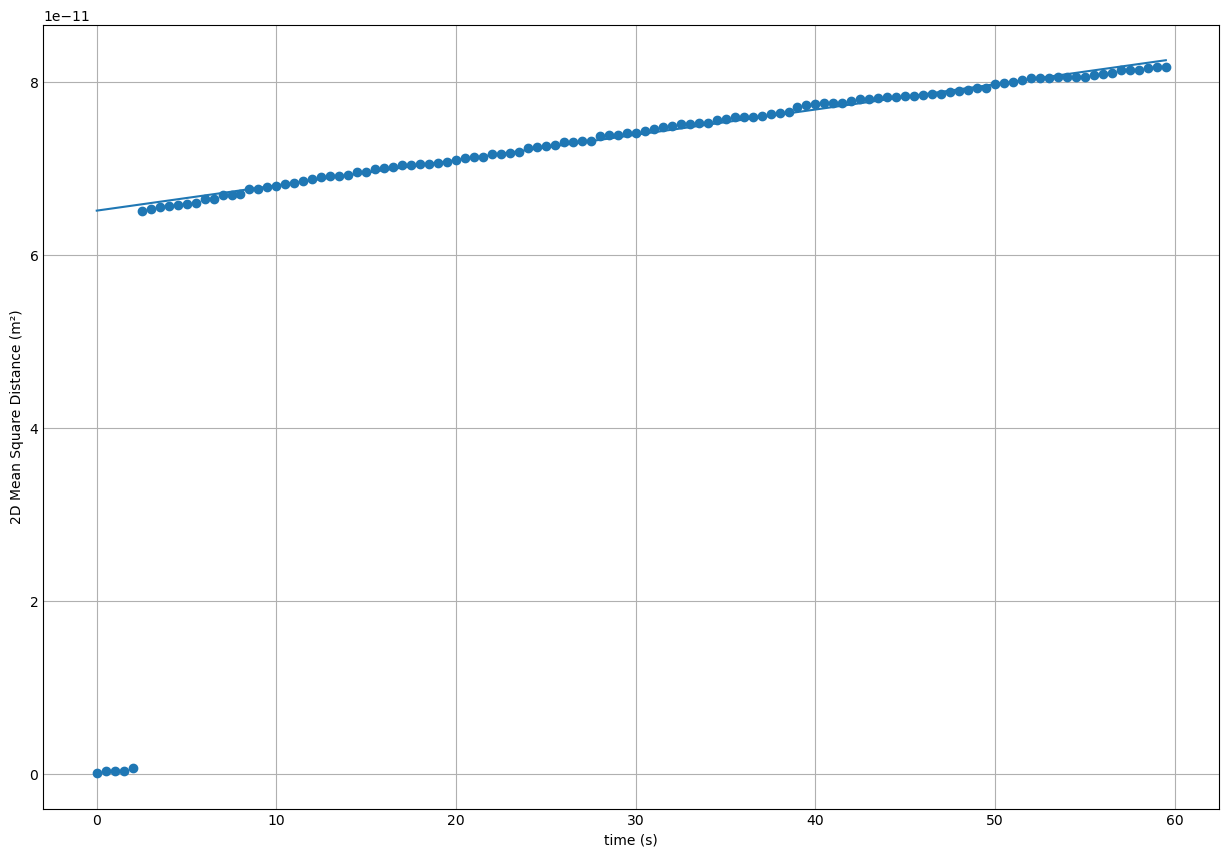

In [46]:
# plot them again

# 0

# make the data
x = np.array(df[0]['time'].to_list())
y = np.array((df[0]['d^2']).to_list())
y_g = np.array((df[0]['d^2_g']).to_list())

# plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("time (s)")
ax.set_ylabel("2D Mean Square Distance (m\u00b2)")

# line of best fit
a[0], b[0] = np.polyfit(x[5:], y_g[5:], 1)
print(a[0], b[0])
ax.plot(x, a[0]*x+b[0])

fig.set_size_inches(12, 8)
name = "msdtime_0.png"
fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

4.3928690370872336e-13 7.83985758041478e-11


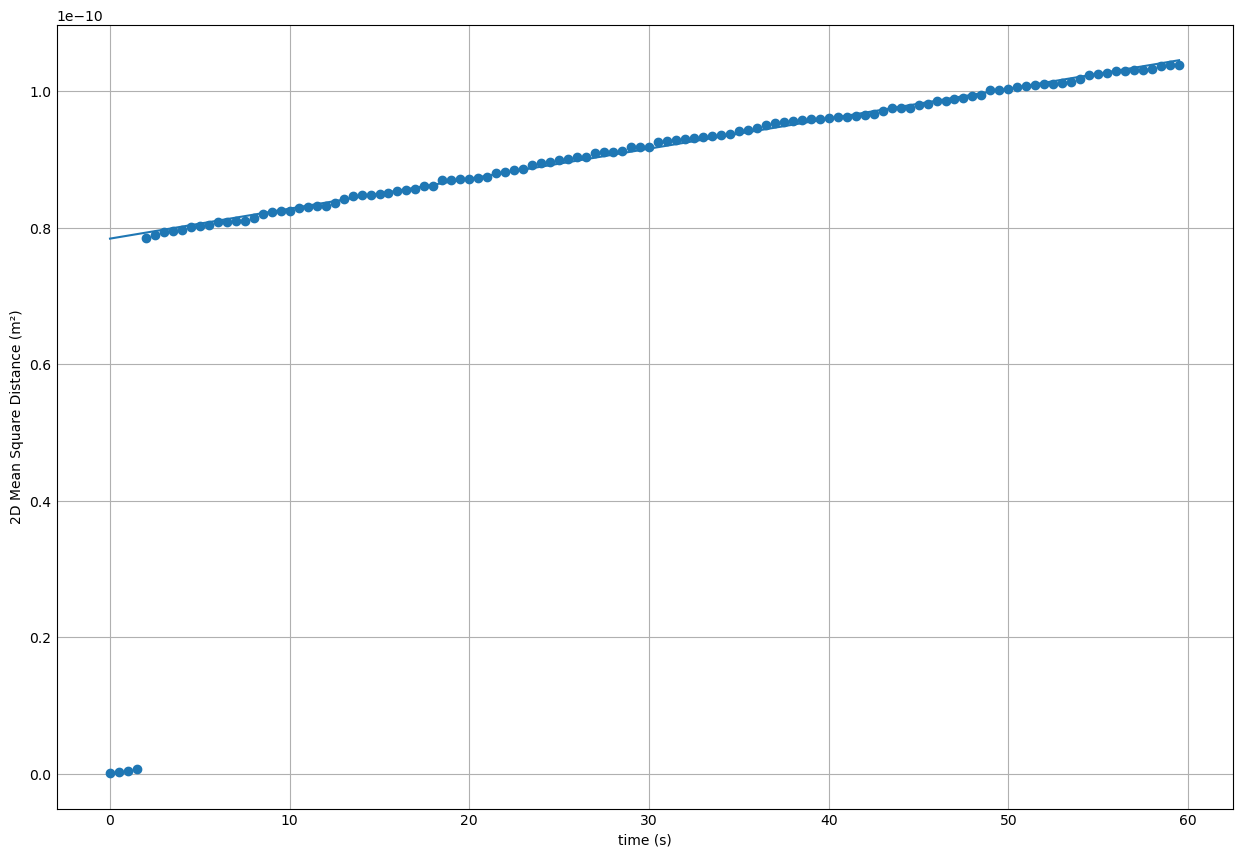

In [47]:
# 8

# make the data
x = np.array(df[8]['time'].to_list())
y = np.array((df[8]['d^2']).to_list())
y_g = np.array((df[8]['d^2_g']).to_list())

# plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("time (s)")
ax.set_ylabel("2D Mean Square Distance (m\u00b2)")

# line of best fit
a[8], b[8] = np.polyfit(x[4:], y_g[4:], 1)
print(a[8], b[8])
ax.plot(x, a[8]*x+b[8])

fig.set_size_inches(12, 8)
name = "msdtime_8.png"
fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

In [48]:
# get D and k
print(a)
D = [e/4 for e in a]
print(D)

# k
r = 0.95*10**(-6)
r_unc = r * (0.1/1.9)
mew = 0.941192*10**(-3) # the decrease from increase of temperature
mew_unc = 0.05
gamma = 6*np.pi*(mew)*r
gamma_unc = gamma * ((mew_unc/mew)**2 + (r_unc/r)**2)**0.5
T = 296.5

k = [gamma*d/T for d in D]
print(k)

[2.9219756877732015e-13, 3.1441270298916256e-13, 2.7559473413125026e-13, 3.110110919603177e-13, 3.8920463865316333e-13, 3.0721981730407554e-13, 3.666583197983187e-13, 3.3915179039079913e-13, 4.3928690370872336e-13, 3.827905870649258e-13, 3.4524171744070166e-13, 4.643602391767261e-13, 3.0277752780584494e-13, 4.036799729921759e-13]
[7.304939219433004e-14, 7.860317574729064e-14, 6.889868353281256e-14, 7.775277299007942e-14, 9.730115966329083e-14, 7.680495432601889e-14, 9.166457994957968e-14, 8.478794759769978e-14, 1.0982172592718084e-13, 9.569764676623145e-14, 8.631042936017542e-14, 1.1609005979418152e-13, 7.569438195146123e-14, 1.0091999324804398e-13]
[4.152358715875724e-24, 4.4680533554816805e-24, 3.9164192950265694e-24, 4.419713770512692e-24, 5.530905956313229e-24, 4.365836756994064e-24, 5.210504920809836e-24, 4.819615367530052e-24, 6.242614581010021e-24, 5.439757206760177e-24, 4.906158050860799e-24, 6.5989265226264164e-24, 4.302708307316653e-24, 5.7366119139614274e-24]


In [49]:
# k
k_acc = 1.38*10**(-23) # J/K
k_avg = sum(k)/len(k)
print(k_acc)
print(k_avg)

1.3799999999999998e-23
5.0078703372199526e-24


### Uncertainties
Calculate `delta`, `syx2` variance of y(x), and `sm` standard deviation of the slope `a` for all data sets. After standard uncertainty propogation, this will get the uncertainty for `D`.
- recall datasets 0 and 8 will be calculated differently since their outliers are removed<br>

Next, calculate the uncertainty for `k` through standard uncertainty propogation. <br>

Then, calculate mean `k` (done above), and standard deviation of the mean for its uncertainty.

In [50]:
# delta the same for any data set (time, x, is the same)
x = df[0]['time'].tolist()
N = len(x)
t1 = 0
t2 = 0
for e in x:
    t1 += e**2
    t2 += e
delta = N*t1 - t2**2
print("delta:", delta)

# redo 0 and 8 separately!
syx2 = [0] * len(a)
sm = [0] * len(a)
j = 0
for d in df:
    # syx2 for each data set
    y = d['d^2'].tolist()
    N = len(y)
    
    t1 = 0
    for i in range(0, len(y)):
        t1 += (y[i] - (b[j] + a[j]*x[i]))**2
    syx2[j] = t1/(N-2)

    # sm
    sm[j] = (N * syx2[j]/delta)**0.5

    j += 1
    
# 0
# syx2
y = df[0]['d^2'][5:].tolist()
N = len(y)
t1 = 0
for i in range(0, len(y)):
    t1 += (y[i] - (b[0] + a[0]*x[i]))**2
syx2[0] = t1/(N-2)
# sm
sm[0] = (N * syx2[0]/delta)**0.5

# 8
# syx2
y = df[8]['d^2'][4:].tolist()
N = len(y)
t1 = 0
for i in range(0, len(y)):
    t1 += (y[i] - (b[8] + a[8]*x[i]))**2
syx2[8] = t1/(N-2)
# sm
sm[8] = (N * syx2[8]/delta)**0.5

print("syx2:", syx2)
print("sm:", sm)

# uncertainty for D
print()
D_unc = [0] * len(a)
for i in range(0, len(a)):
    D_unc[i] = D[i] * sm[i]/a[i]

print("D:", D)
print("D_unc:", D_unc)

delta: 4319700.0
syx2: [6.719265053603182e-25, 2.1929547305693106e-25, 1.321814781593807e-25, 1.041680236192029e-25, 9.815670273343045e-26, 1.068004386742409e-25, 3.304050913431046e-25, 2.8396940920361523e-25, 9.297888348925454e-25, 2.5594215378778407e-25, 1.7451555760825967e-25, 1.0167290683327052e-24, 3.524840746968192e-25, 3.5330736924504816e-25]
sm: [4.229441413320714e-15, 2.4681904244408794e-15, 1.9162366044048052e-15, 1.701104690194976e-15, 1.6512917472602815e-15, 1.7224647705351967e-15, 3.029613276267992e-15, 2.8086628425433996e-15, 4.996827589259766e-15, 2.6664579542429526e-15, 2.2018153973600825e-15, 5.314549420175487e-15, 3.1292018615754677e-15, 3.132854157433661e-15]

D: [7.304939219433004e-14, 7.860317574729064e-14, 6.889868353281256e-14, 7.775277299007942e-14, 9.730115966329083e-14, 7.680495432601889e-14, 9.166457994957968e-14, 8.478794759769978e-14, 1.0982172592718084e-13, 9.569764676623145e-14, 8.631042936017542e-14, 1.1609005979418152e-13, 7.569438195146123e-14, 1.00919

In [51]:
# uncertainty for k
k_unc = [0] * len(k)
for i in range(0, len(k)):
    k_unc[i] = k[i] * ((D_unc[i]/D[i])**2 + (gamma_unc/gamma)**2 + (0.5/296.5)**2)**0.5

print("k:", k)
print("k_unc:", k_unc)

k: [4.152358715875724e-24, 4.4680533554816805e-24, 3.9164192950265694e-24, 4.419713770512692e-24, 5.530905956313229e-24, 4.365836756994064e-24, 5.210504920809836e-24, 4.819615367530052e-24, 6.242614581010021e-24, 5.439757206760177e-24, 4.906158050860799e-24, 6.5989265226264164e-24, 4.302708307316653e-24, 5.7366119139614274e-24]
k_unc: [2.2059053359774496e-22, 2.3736153724783547e-22, 2.0805644611360792e-22, 2.3479353655968343e-22, 2.938246761101152e-22, 2.3193136608337854e-22, 2.7680364599501654e-22, 2.5603797067167175e-22, 3.316335981900029e-22, 2.889824778547617e-22, 2.606354758905977e-22, 3.5056236759622455e-22, 2.2857772391569916e-22, 3.0475263248251164e-22]


In [52]:
# mean and standard deviation for k

# standard deviation for each k
sd_k = 0
N = len(k)
t1 = 0
for i in range(0, N):
    t1 += (k[i]-k_avg)**2

sd_k = (t1/(N-1))**0.5
sd_k_avg = sd_k/(N**0.5)
k_unc_avg = sum(k_unc)/len(k_unc)

print("k_avg:", k_avg)
print("sd_k_avg:", sd_k_avg)
print("k_unc_avg:", k_unc_avg)

k_avg: 5.0078703372199526e-24
sd_k_avg: 2.1742767752498006e-25
k_unc_avg: 2.660388563077751e-22


**NOT SURE WHICH `K_UNC` IS CORRECT**,
gonna use k_unc_avg bc it's larger but that's some weak ahh reasoning

In [53]:
print("literal difference:", k_acc-k_avg)
print("error:", (k_acc-k_avg)/k_acc)

literal difference: 8.792129662780044e-24
error: 0.6371108451289889
